In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [7]:
nan_dict={}
def nan_feature(df,feature):
    if df[feature].isnull().sum()>=1:
        nan_dict[feature]=df[feature].isnull().sum()

In [8]:
for feature in df.columns:
    nan_feature(df,feature)

In [9]:
nan_dict

{'Age': 177, 'Cabin': 687, 'Embarked': 2}

In [10]:
nan_list=nan_dict.keys()

In [11]:
nan_list

dict_keys(['Age', 'Cabin', 'Embarked'])

### those feature have nan values out of that we seperate object type features in a list

In [12]:
object_list=[]
numeric_list=[]
def object_dtype_of_nan_feature(df,feature):
    if df[feature].dtype=='O':
        object_list.append(feature)
    else:
        numeric_list.append(feature)

In [13]:
for feature in nan_dict.keys():
    object_dtype_of_nan_feature(df,feature)

In [14]:
object_list

['Cabin', 'Embarked']

### we will check the veriance difference between mean imputaion and random imputation
### Handling Numerical missing value

In [15]:
numeric_list

['Age']

In [16]:
def nan_imputation(df,feature):
    df[feature+'_median']=df[feature].fillna(df[feature].median())
    df[feature+'_mean']=df[feature].fillna(df[feature].mean())
    df[feature+"_random"]=df[feature]
    ##It will have the random sample to fill the na
    random_sample=df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature+'_random']=random_sample

In [17]:
for feature in numeric_list:
    nan_imputation(df,feature)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_median,Age_mean,Age_random
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,22.0,22.0,22.0
1,2,1,1,female,38.0,1,0,71.2833,C85,C,38.0,38.0,38.0
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,26.0,26.0,26.0
3,4,1,1,female,35.0,1,0,53.1000,C123,S,35.0,35.0,35.0
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,35.0,35.0,35.0


In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked', 'Age_median', 'Age_mean', 'Age_random'],
      dtype='object')

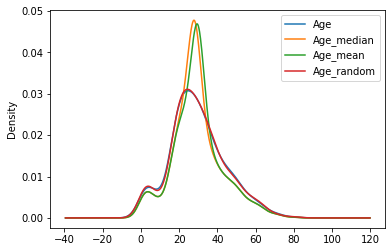

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde',ax=ax)
df.Age_mean.plot(kind='kde',ax=ax)
df.Age_random.plot(kind='kde',ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### we can see random_sample_imputation gave me less variance  

In [21]:
df.drop(['Age','Age_mean','Age_median'],axis=1,inplace=True)

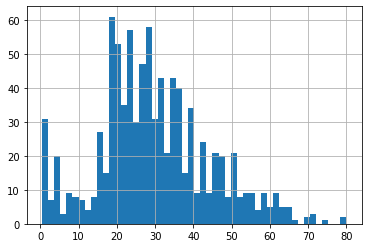

In [22]:
df.Age_random.hist(bins=50)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_random
0,1,0,3,male,1,0,7.2500,NaN,S,22.0
1,2,1,1,female,1,0,71.2833,C85,C,38.0
2,3,1,3,female,0,0,7.9250,NaN,S,26.0
3,4,1,1,female,1,0,53.1000,C123,S,35.0
4,5,0,3,male,0,0,8.0500,NaN,S,35.0


In [24]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
Age_random       0
dtype: int64

### Handling Catagorical missing values

In [25]:
def catagorical_imputaion(df,feature):
    df[feature+'_bool']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(df[feature].value_counts().index[0],inplace=True)

In [26]:
for feature in object_list:
    catagorical_imputaion(df,feature)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_random,Cabin_bool,Embarked_bool
0,1,0,3,male,1,0,7.2500,C23 C25 C27,S,22.0,1,0
1,2,1,1,female,1,0,71.2833,C85,C,38.0,0,0
2,3,1,3,female,0,0,7.9250,C23 C25 C27,S,26.0,1,0
3,4,1,1,female,1,0,53.1000,C123,S,35.0,0,0
4,5,0,3,male,0,0,8.0500,C23 C25 C27,S,35.0,1,0


In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
Age_random       0
Cabin_bool       0
Embarked_bool    0
dtype: int64

In [29]:
OneHotEncoding=pd.get_dummies(df['Sex'])
df=pd.concat([df,OneHotEncoding],axis=1)

In [30]:
OneHotEncoding=pd.get_dummies(df['Embarked'],drop_first=True)
df=pd.concat([df,OneHotEncoding],axis=1)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_random,Cabin_bool,Embarked_bool,female,male,Q,S
0,1,0,3,male,1,0,7.2500,C23 C25 C27,S,22.0,1,0,0,1,0,1
1,2,1,1,female,1,0,71.2833,C85,C,38.0,0,0,1,0,0,0
2,3,1,3,female,0,0,7.9250,C23 C25 C27,S,26.0,1,0,1,0,0,1
3,4,1,1,female,1,0,53.1000,C123,S,35.0,0,0,1,0,0,1
4,5,0,3,male,0,0,8.0500,C23 C25 C27,S,35.0,1,0,0,1,0,1


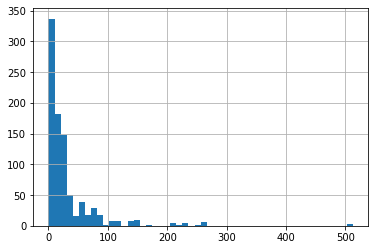

In [32]:
df.Fare.hist(bins=50)

{'whiskers': [<matplotlib.lines.Line2D at 0x24958fcaac8>,
 'caps': [<matplotlib.lines.Line2D at 0x24958fcc488>,
 'boxes': [<matplotlib.lines.Line2D at 0x24958fb9948>],
 'medians': [<matplotlib.lines.Line2D at 0x24958fd1408>],
 'fliers': [<matplotlib.lines.Line2D at 0x24958fd1bc8>],
 'means': []}

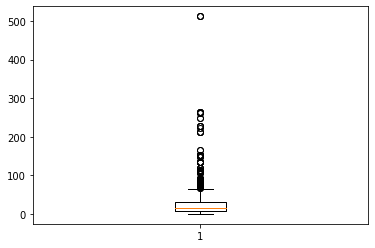

In [33]:
plt.boxplot(df.Fare)

In [34]:
outliers_list=[]
def outliers(df,feature):
    mean=df[feature].mean()
    std=df[feature].std()
    for i in df[feature]:
        z_score=(i-mean)/std
        df[feature+'_z_score']=z_score

In [35]:
outliers(df,'Fare')

In [36]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_random,Cabin_bool,Embarked_bool,female,male,Q,S,Fare_z_score
0,1,0,3,male,1,0,7.2500,C23 C25 C27,S,22.0,1,0,0,1,0,1,-0.492101
1,2,1,1,female,1,0,71.2833,C85,C,38.0,0,0,1,0,0,0,-0.492101
2,3,1,3,female,0,0,7.9250,C23 C25 C27,S,26.0,1,0,1,0,0,1,-0.492101
3,4,1,1,female,1,0,53.1000,C123,S,35.0,0,0,1,0,0,1,-0.492101
4,5,0,3,male,0,0,8.0500,C23 C25 C27,S,35.0,1,0,0,1,0,1,-0.492101


### We take untill 3rd standard deviation where z_score value<3

In [37]:
df=df[np.abs(df.Fare_z_score)<3]

In [38]:
df=df[df.Fare<250]

In [39]:
df.Fare.max()

247.5208

In [40]:
def catagory_type(df,feature):
    print(feature)
    print('\n')
    print(df[feature].value_counts())

In [41]:
for i in df.columns:
    catagory_type(df,i)

PassengerId


891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 882, dtype: int64
Survived


0    547
1    335
Name: Survived, dtype: int64
Pclass


3    491
1    207
2    184
Name: Pclass, dtype: int64
Sex


male      573
female    309
Name: Sex, dtype: int64
SibSp


0    605
1    208
2     26
4     18
3     13
8      7
5      5
Name: SibSp, dtype: int64
Parch


0    676
1    117
2     75
5      5
3      5
4      3
6      1
Name: Parch, dtype: int64
Fare


8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.3625      1
61.3792     1
14.1083     1
75.2500     1
17.4000     1
Name: Fare, Length: 245, dtype: int64
Cabin


C23 C25 C27    686
G6               4
B96 B98          4
D                3
E101             3
              ... 
B82 B84          1
E38              1
E77              1
D15              1
E63              1
Name: Cabin, Length: 145, dtype: int64
Embarked


S  

In [42]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_random,Cabin_bool,Embarked_bool,female,male,Q,S,Fare_z_score
0,1,0,3,male,1,0,7.2500,C23 C25 C27,S,22.0,1,0,0,1,0,1,-0.492101
1,2,1,1,female,1,0,71.2833,C85,C,38.0,0,0,1,0,0,0,-0.492101
2,3,1,3,female,0,0,7.9250,C23 C25 C27,S,26.0,1,0,1,0,0,1,-0.492101
3,4,1,1,female,1,0,53.1000,C123,S,35.0,0,0,1,0,0,1,-0.492101
4,5,0,3,male,0,0,8.0500,C23 C25 C27,S,35.0,1,0,0,1,0,1,-0.492101


### In Cabin feature 'G6' has 691 times and others are just 3 or 4 times so I replace it.

In [43]:
df["Cabin"]=np.where(df.Cabin=='G6',1,0)

In [44]:
df.drop(['Sex','Embarked','Embarked_bool'],axis=1,inplace=True)

In [45]:
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Cabin,Age_random,Cabin_bool,female,male,Q,S,Fare_z_score
0,1,0,3,1,0,7.2500,0,22.0,1,0,1,0,1,-0.492101
1,2,1,1,1,0,71.2833,0,38.0,0,1,0,0,0,-0.492101
2,3,1,3,0,0,7.9250,0,26.0,1,1,0,0,1,-0.492101
3,4,1,1,1,0,53.1000,0,35.0,0,1,0,0,1,-0.492101
4,5,0,3,0,0,8.0500,0,35.0,1,0,1,0,1,-0.492101


In [46]:
df.drop('Fare_z_score',axis=1,inplace=True)

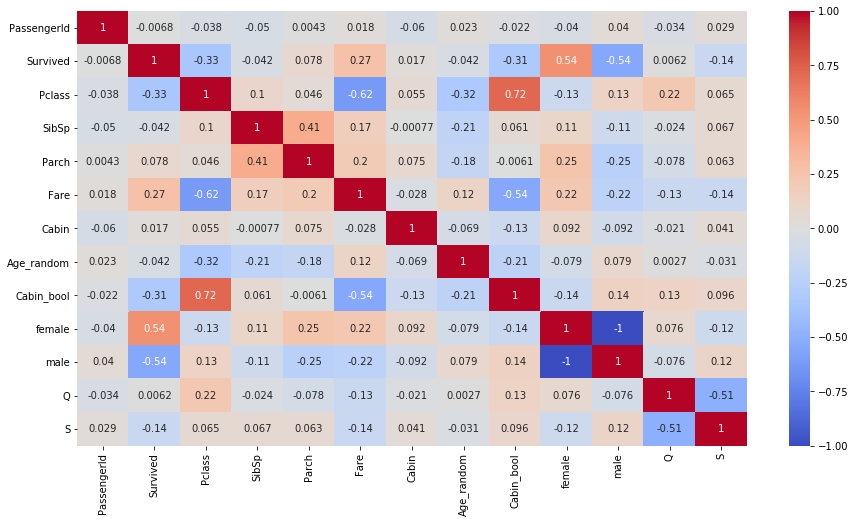

In [47]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [48]:
df.drop(['Cabin','Cabin_bool','male'],axis=1,inplace=True)

### Handling test data

In [49]:
df_test=pd.read_csv('titanic_test.csv')

In [50]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [52]:
nan_imputation(df_test,'Age')

In [53]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_mean,Age_random
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5,34.5,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0,47.0,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0,62.0,62.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0,27.0,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0,22.0,22.0


In [54]:
df_test.drop(['Name','Ticket','Age_median','Age_mean','Cabin'],axis=1, inplace=True)

In [55]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_random
0,892,3,male,34.5,0,0,7.8292,Q,34.5
1,893,3,female,47.0,1,0,7.0000,S,47.0
2,894,2,male,62.0,0,0,9.6875,Q,62.0
3,895,3,male,27.0,0,0,8.6625,S,27.0
4,896,3,female,22.0,1,1,12.2875,S,22.0


In [56]:
OneHotEncoding=pd.get_dummies(df_test['Embarked'],drop_first=True)
df_test=pd.concat([df_test,OneHotEncoding],axis=1)

In [57]:
OneHotEncoding=pd.get_dummies(df_test['Sex'],drop_first=True)
df_test=pd.concat([df_test,OneHotEncoding],axis=1)

In [58]:
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age_random,female,Q,S
0,1,0,3,1,0,7.2500,22.0,0,0,1
1,2,1,1,1,0,71.2833,38.0,1,0,0
2,3,1,3,0,0,7.9250,26.0,1,0,1
3,4,1,1,1,0,53.1000,35.0,1,0,1
4,5,0,3,0,0,8.0500,35.0,0,0,1


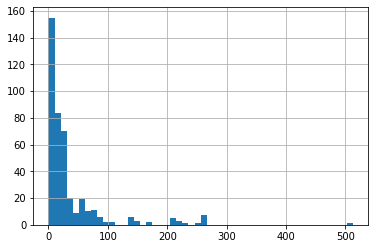

In [59]:
df_test.Fare.hist(bins=50)

In [60]:
mode=df_test.Fare.mode()
mode

0    7.75
dtype: float64

In [61]:
df_test.fillna({'Fare':7.75},inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x24959248b88>,
 'caps': [<matplotlib.lines.Line2D at 0x2495924dbc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x249592391c8>],
 'medians': [<matplotlib.lines.Line2D at 0x24959250b48>],
 'fliers': [<matplotlib.lines.Line2D at 0x24959255348>],
 'means': []}

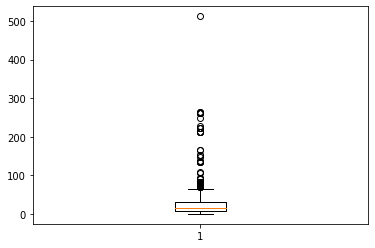

In [62]:
plt.boxplot(df_test.Fare)

In [63]:
outliers(df_test,'Fare')

### We take untill 3rd standard deviation where z_score value<3

In [64]:
df_test=df_test[np.abs(df_test.Fare_z_score)<3]

In [65]:
df_test=df_test[df_test.Fare<250]

In [66]:
df_test.Fare.max()

247.5208

In [67]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_random,Q,S,male,Fare_z_score
0,892,3,male,34.5,0,0,7.8292,Q,34.5,1,0,1,-0.236356
1,893,3,female,47.0,1,0,7.0000,S,47.0,0,1,0,-0.236356
2,894,2,male,62.0,0,0,9.6875,Q,62.0,1,0,1,-0.236356
3,895,3,male,27.0,0,0,8.6625,S,27.0,0,1,1,-0.236356
4,896,3,female,22.0,1,1,12.2875,S,22.0,0,1,0,-0.236356


{'whiskers': [<matplotlib.lines.Line2D at 0x249592a7b48>,
 'caps': [<matplotlib.lines.Line2D at 0x249592a7e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x24959298ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x249592aad08>],
 'fliers': [<matplotlib.lines.Line2D at 0x249592aaf08>],
 'means': []}

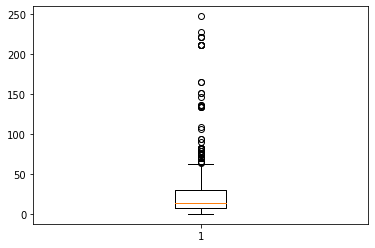

In [68]:
plt.boxplot(df_test.Fare)

In [69]:
df_test.Fare.max()

247.5208

In [70]:
df_test.drop(['Sex','Embarked','Age'],axis=1,inplace=True)

In [71]:
df_test.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Age_random,Q,S,male,Fare_z_score
0,892,3,0,0,7.8292,34.5,1,0,1,-0.236356
1,893,3,1,0,7.0000,47.0,0,1,0,-0.236356
2,894,2,0,0,9.6875,62.0,1,0,1,-0.236356
3,895,3,0,0,8.6625,27.0,0,1,1,-0.236356
4,896,3,1,1,12.2875,22.0,0,1,0,-0.236356


In [72]:
df_test.drop('Fare_z_score',axis=1,inplace=True)

In [73]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
SibSp          0
Parch          0
Fare           0
Age_random     0
Q              0
S              0
male           0
dtype: int64

In [74]:
X=df.drop('Survived',axis=1)
y=df['Survived']

### Hyperparameter Tuning

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [76]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [77]:
from scipy.stats import randint

In [78]:
parameter_dict={'max_depth':randint(1,6),
               'n_estimators':[100,200,300,400,500],
               'max_features':randint(1,3),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4)}

In [79]:
from sklearn.model_selection import RandomizedSearchCV
def hyperparameter_tuning(model,parameter_dict,X_train,y_train,no_iter):
    search_model=RandomizedSearchCV(model,parameter_dict,n_jobs=-1,cv=9)
    
    search_model.fit(X_train,y_train)
    best_parameter=search_model.best_params_
    best_score=search_model.best_score_
    
    return best_parameter,best_score

In [80]:
rf_parameter,rf_score=hyperparameter_tuning(model,parameter_dict,X_train,y_train,40)

In [81]:
print(rf_parameter)
print(rf_score)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 300}
0.8098380756608604


### Afetr getting best parameter values I put in my model

In [82]:
model=RandomForestClassifier(n_jobs=-1, bootstrap=False, criterion= 'gini',
                     max_depth= 5, max_features= 1, 
                    min_samples_leaf= 2, n_estimators= 500)
model.fit(X_train,y_train)
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy for train data',accuracy_score(y_train,y_train_predict))
print('Accuracy for test data',accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))
pd.crosstab(y_test,y_predict)

Accuracy for train data 0.851063829787234
Accuracy for test data 0.8531073446327684
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       115
           1       0.83      0.73      0.78        62

    accuracy                           0.85       177
   macro avg       0.85      0.82      0.83       177
weighted avg       0.85      0.85      0.85       177



col_0,0,1
Survived,,
0,106,9
1,17,45


### Apply on Test dataset

In [84]:
y_testdata_pred=model.predict(df_test)

In [88]:
final_df=pd.DataFrame({'PassengerId': df_test['PassengerId'],
                      "Survived": y_testdata_pred})
final_df.to_csv(r'C:\Users\USER\Desktop\D.S\Missing value handling\submission.csv',index= False)